**ABSTRACT**

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.



**DATA SET INFORMATION**

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**ATTRIBUTE INFORMATION**

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.

**DATASET INFORMATION**
* https://archive.ics.uci.edu/ml/machine-learning-databases/00352/

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [ ]:
data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data = data[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]

In [ ]:
data.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


In [ ]:
print(data.shape)
print(data.columns)

(541909, 8)
Index(['CustomerID', 'InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice',
       'Description', 'InvoiceDate', 'Country'],
      dtype='object')


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


In [ ]:
data.isnull().sum()

CustomerID     135080
InvoiceNo           0
StockCode           0
Quantity            0
UnitPrice           0
Description      1454
InvoiceDate         0
Country             0
dtype: int64

In [ ]:
data.dtypes

CustomerID            float64
InvoiceNo              object
StockCode              object
Quantity                int64
UnitPrice             float64
Description            object
InvoiceDate    datetime64[ns]
Country                object
dtype: object

In [ ]:
data.nunique()

CustomerID      4372
InvoiceNo      25900
StockCode       4070
Quantity         722
UnitPrice       1630
Description     4223
InvoiceDate    23260
Country           38
dtype: int64

In [ ]:
# Based on understanding of the data it seems this company is more into online retail across 38 countries

country_list = data['Country'].tolist()
print(country_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df = pd.DataFrame(data)

In [ ]:
# Analyze the sales performance of this company and provide Insights
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=5,column='Totalamount',value=TotalAmount)

In [ ]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Totalamount,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


In [ ]:
# df.drop(['UnitPrice'],axis=1,inplace=True)

# EXPLORATORY DATA ANALYSIS

In [ ]:
# grouping countries by Total Amount of Sales
country_price = df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


In [ ]:
# y_sales = np.arange(len(df['Quantity']))

In [ ]:
# plt.bar(df['Country'],TotalAmount,width=0.4)[:5]


# plt.figure(figsize=(15,5))
# plt.xlabel('Country name')
# plt.ylabel('Total Sales amount')
# plt.title('Country wise Total Sales amount or Revenue')
# plt.show()

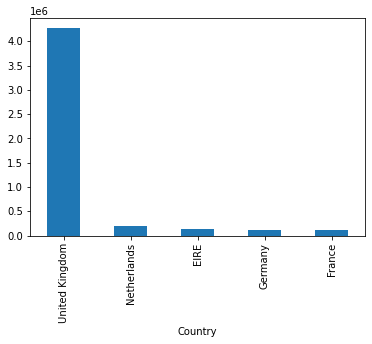

In [ ]:
# top 5 countries with high number of purchases
country_price[:5].plot(kind='bar')

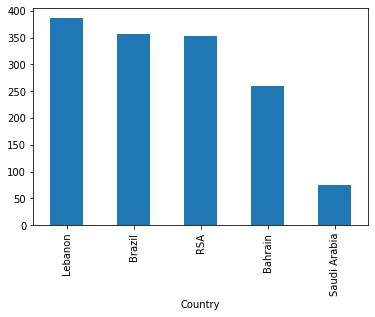

In [ ]:
# 5 countries with least number of purchases
country_price[33:].plot(kind = 'bar')

In [ ]:
# adding year feature to the dataset
timeset = df['InvoiceDate'].dt.year
df['Year'] = timeset
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Totalamount,Description,InvoiceDate,Country,Year
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,2010
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,2010


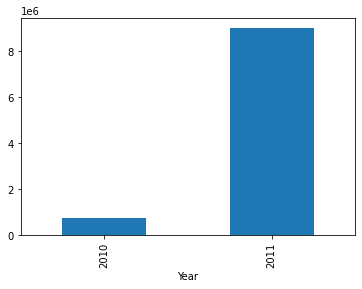

In [ ]:
# total sales for different years
df.groupby('Year')['Totalamount'].sum().plot(kind= 'bar')

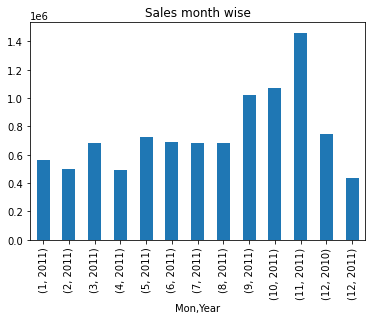

In [ ]:
# sales for different months
df['Mon'] = df['InvoiceDate'].dt.month
df['month'] = df['InvoiceDate'].dt.month_name()
df.groupby(['Mon','Year'])['Totalamount'].sum().plot(kind = 'bar',title = 'Sales month wise')

In [ ]:
df['Day'] = df['InvoiceDate'].dt.day_name()

In [ ]:
# checking why dec 2011 has a drop comparing to nov 2011
get_2011 = df[(df['Year'] == 2011)]
get_dec2011 = get_2011[(df['month'] == 'December')]
get_dec2011 = get_dec2011['InvoiceDate'].dt.date.unique()
get_dec2011

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


array([datetime.date(2011, 12, 1), datetime.date(2011, 12, 2),
       datetime.date(2011, 12, 4), datetime.date(2011, 12, 5),
       datetime.date(2011, 12, 6), datetime.date(2011, 12, 7),
       datetime.date(2011, 12, 8), datetime.date(2011, 12, 9)],
      dtype=object)

**Performance Analysis**

sales performance can be seen with
* number of sales every month
* number of sales every year
* We see that in 2010 we have sales only for dec and in 2011 we have sales for all months
* we see that from september to november we have very good sales
* We could see that Dec 2010 we have sales of 748957 and in Dec 2011 we have sales of 433668 which is a huge drop when analyzed further found that we have only data upto 9th of Dec 2011, so we find a sales drop in the month of Dec 2011.

Based on the Analysis of the data what are the potential areas of improvement for the business?

In [ ]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Totalamount,Description,InvoiceDate,Country,Year,Mon,month,Day
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday


In [ ]:
df.isnull().sum()/len(df)*100

CustomerID     24.926694
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
UnitPrice       0.000000
Totalamount     0.000000
Description     0.268311
InvoiceDate     0.000000
Country         0.000000
Year            0.000000
Mon             0.000000
month           0.000000
Day             0.000000
dtype: float64

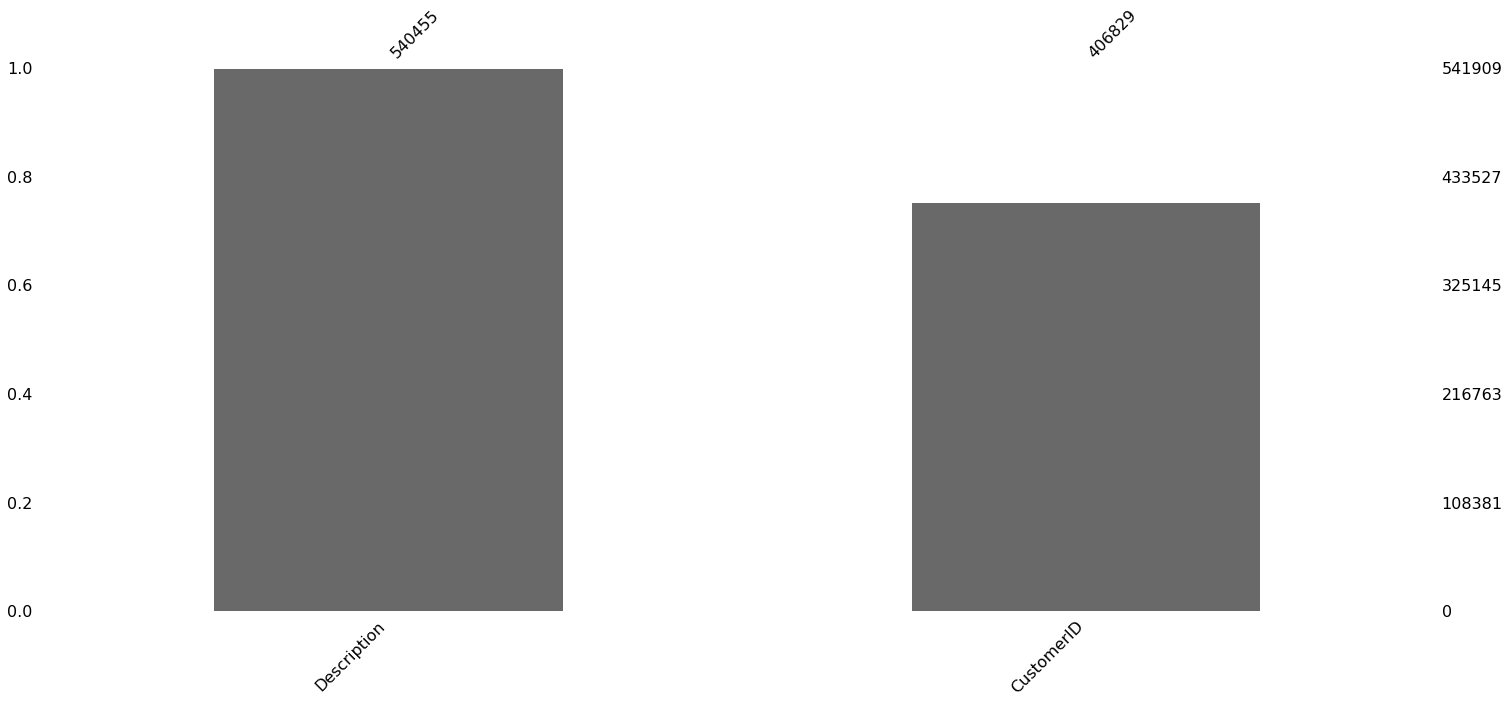

In [ ]:
import missingno as msno
df_missing = df.filter(['Description','CustomerID'],axis=1)
msno.bar(df_missing)

#link = https://medium.com/analytics-vidhya/e-commerce-data-exploratory-data-analysis-eda-99b17cf53765

In [ ]:
# Let's see if we have hidden nan-values
df[df['Description'].str.contains('[?]',na=False)]

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Totalamount,Description,InvoiceDate,Country,Year,Mon,month,Day
7313,NaN,537032,21275,-30,0.0,-0.0,?,2010-12-03 16:50:00,United Kingdom,2010,12,December,Friday
21518,NaN,538090,20956,-723,0.0,-0.0,?,2010-12-09 14:48:00,United Kingdom,2010,12,December,Thursday
38261,NaN,539494,21479,752,0.0,0.0,?,2010-12-20 10:36:00,United Kingdom,2010,12,December,Monday
43662,NaN,540100,22837,-106,0.0,-0.0,?,2011-01-04 16:53:00,United Kingdom,2011,1,January,Tuesday
50806,NaN,540558,21258,-29,0.0,-0.0,?,2011-01-10 10:04:00,United Kingdom,2011,1,January,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514649,NaN,579734,84859C,-153,0.0,-0.0,wet?,2011-11-30 14:25:00,United Kingdom,2011,11,November,Wednesday
514735,NaN,579742,85204,-1131,0.0,-0.0,lost??,2011-11-30 14:34:00,United Kingdom,2011,11,November,Wednesday
524370,NaN,580547,21201,-390,0.0,-0.0,???,2011-12-05 09:29:00,United Kingdom,2011,12,December,Monday
535324,NaN,581201,22217,-155,0.0,-0.0,damages?,2011-12-07 18:30:00,United Kingdom,2011,12,December,Wednesday


In [ ]:
df[df['Description'].str.contains('missing',na=False)]

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Totalamount,Description,InvoiceDate,Country,Year,Mon,month,Day
218477,NaN,556046,21890,-140,0.0,-0.0,missing,2011-06-08 12:56:00,United Kingdom,2011,6,June,Wednesday
323469,NaN,565310,21829,-1897,0.0,-0.0,?missing,2011-09-02 12:26:00,United Kingdom,2011,9,September,Friday
324024,NaN,565385,22435,-434,0.0,-0.0,?missing,2011-09-02 15:46:00,United Kingdom,2011,9,September,Friday
418129,NaN,572701,85078,-840,0.0,-0.0,missing,2011-10-25 14:31:00,United Kingdom,2011,10,October,Tuesday
464813,NaN,576185,22575,-130,0.0,-0.0,missing?,2011-11-14 11:25:00,United Kingdom,2011,11,November,Monday
493686,NaN,578245,22568,-170,0.0,-0.0,?? missing,2011-11-23 12:37:00,United Kingdom,2011,11,November,Wednesday
497819,NaN,578476,72807B,-124,0.0,-0.0,????missing,2011-11-24 12:45:00,United Kingdom,2011,11,November,Thursday
497820,NaN,578477,72807A,-224,0.0,-0.0,???missing,2011-11-24 12:45:00,United Kingdom,2011,11,November,Thursday
497821,NaN,578478,72807C,-428,0.0,-0.0,???missing,2011-11-24 12:45:00,United Kingdom,2011,11,November,Thursday
536908,NaN,581226,23090,-338,0.0,-0.0,missing,2011-12-08 09:56:00,United Kingdom,2011,12,December,Thursday


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7f2fb00b9050>,
 [Text(0, 0, 'Jan-2010'),
  Text(0, 0, 'Feb-2011'),
  Text(0, 0, 'Mar-2011'),
  Text(0, 0, 'Apr-2011'),
  Text(0, 0, 'may-2011'),
  Text(0, 0, 'Jun-2011'),
  Text(0, 0, 'July-2011'),
  Text(0, 0, 'Aug-2011'),
  Text(0, 0, 'Aug-2011'),
  Text(0, 0, 'Sep-2011'),
  Text(0, 0, 'Oct-2011'),
  Text(0, 0, 'Nov-2011')])

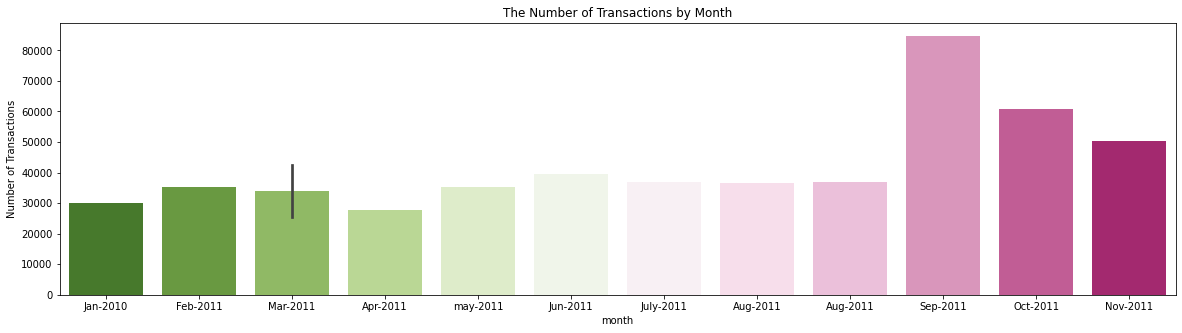

In [ ]:
# let's find transaction volume by year and month
df1 = df.groupby(['month','Year'],as_index = False)['InvoiceNo'].count()
plt.figure(figsize=(20,5))
sns.barplot(df1.month,df1.InvoiceNo,palette = 'PiYG_r')
plt.ylabel('Number of Transactions')
plt.title('The Number of Transactions by Month')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan-2010','Feb-2011','Mar-2011','Apr-2011','may-2011','Jun-2011','July-2011','Aug-2011','Aug-2011','Sep-2011','Oct-2011','Nov-2011','Dec-2011'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7f2fafca4e10>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thur'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'sat'),
  Text(0, 0, 'Sun')])

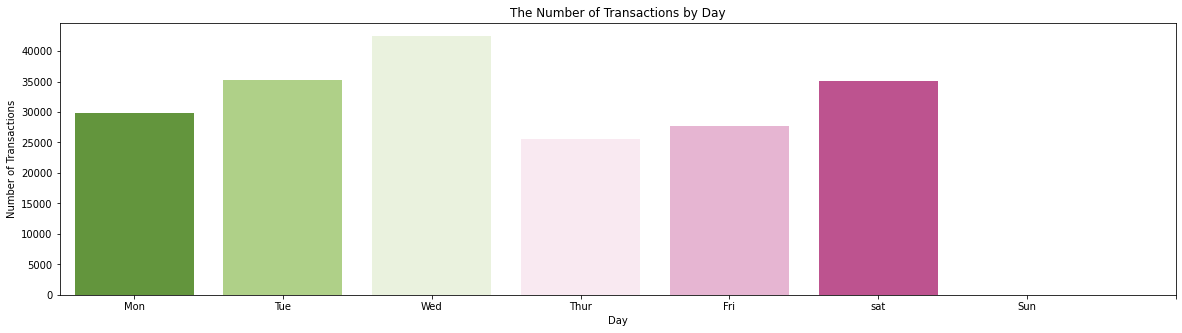

In [ ]:
df2 = df.groupby(['Day'],as_index = False)['InvoiceNo'].count()
plt.figure(figsize=(20,5))
sns.barplot(df2.Day,df1.InvoiceNo,palette = 'PiYG_r')
plt.ylabel('Number of Transactions')
plt.title('The Number of Transactions by Day')
plt.xticks([0,1,2,3,4,5,6,7],['Mon','Tue','Wed','Thur','Fri','sat','Sun'])

In [ ]:
# to check cancelled orders
df3 = df.groupby(['CustomerID','InvoiceNo'],as_index=False)['Quantity'].sum()
df3 = df3.sort_values(by = 'CustomerID')
df3.head()

,CustomerID,InvoiceNo,Quantity
0,12346.0,541431,74215
1,12346.0,C541433,-74215
2,12347.0,537626,319
3,12347.0,542237,315
4,12347.0,549222,483


In [ ]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Totalamount,Description,InvoiceDate,Country,Year,Mon,month,Day
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday


In [ ]:
# df5 = df[df['Canceled_orders'] == 1].groupby(['CustomerID','InvoiceNo','Canceled_orders'],as_index = False)['Quantity'].sum()
# df5.head()

In [ ]:
# df6 = df.groupby(['CustomerID','InvoiceNO'],as_index=False)['Totalamount'].sum()
# df6 = df.sort_values(by = 'CustomerID')
# df6

In [ ]:
# df6 = df[df.UnitPrice == 0].groupby(['CustomerID','StockCode','Description'],as_index=False)['Quantity'].sum()
# df6.head()

**OUTLIER DETECTION**

In [ ]:
df_new = df.select_dtypes(include=['int','float'])

from scipy import stats

outliers = {}
for col in df_new:
  lower_lim = df_new[col].quantile(q=0.01)
  upper_lim = df_new[col].quantile(q=0.99)
  outliers[col] = len(df_new[col][(df_new[col] > upper_lim) | (df_new[col] < lower_lim)])

In [ ]:
outliers_hardedge = pd.DataFrame(outliers.items(),columns=['Feature','Outliers'])
outliers_hardedge

,Feature,Outliers
0,CustomerID,7939
1,Quantity,9995
2,UnitPrice,8429
3,Totalamount,10788
4,Year,0
5,Mon,0


In [ ]:
cor = df.corr()
cor.style.background_gradient(cmap='coolwarm').set_precision(2)

,CustomerID,Quantity,UnitPrice,Totalamount,Year,Mon
CustomerID,1.00,-0.00,-0.00,-0.00,-0.04,0.03
Quantity,-0.00,1.00,-0.00,0.89,0.00,-0.00
UnitPrice,-0.00,-0.00,1.00,-0.16,-0.00,-0.00
Totalamount,-0.00,0.89,-0.16,1.00,0.00,0.00
Year,-0.04,0.00,-0.00,0.00,1.00,-0.37
Mon,0.03,-0.00,-0.00,0.00,-0.37,1.00


Dropping the Null Values and to find what are potential areas of improvement for the business?

In [ ]:
new_df = df.dropna()
new_df.isnull().sum()

CustomerID     0
InvoiceNo      0
StockCode      0
Quantity       0
UnitPrice      0
Totalamount    0
Description    0
InvoiceDate    0
Country        0
dtype: int64

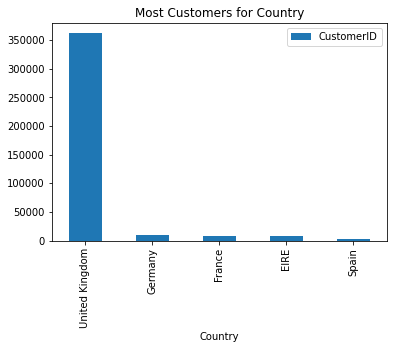

In [ ]:
# countries with more number of customers
cus_id = pd.DataFrame(new_df.groupby('Country')['CustomerID'].count().sort_values(ascending=False))
cus_id[:5].plot(kind = 'bar',title = 'Most Customers for Country')

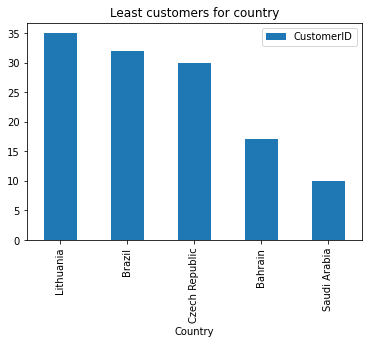

In [ ]:
# countries with less number odf customers
cus_id[-5:].plot(kind = 'bar',title = 'Least customers for country')

**EXPLANATIONS**
* We find very less number of customers in Lithania,Brazil,Czech Republic,Baharain,Saudi Arabia
* We have very less sales for Lebanon,Brazil,RSA,Saudi Arabia.We can concentrate on improving their sales
* we may improve the business by increasing the revenue and attracting more customers by means of discount,promotions etc

What are additional business problems that can be analyzed using this data ?

In [ ]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Totalamount,Description,InvoiceDate,Country,Year,Mon,month,Day
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,2010,12,December,Wednesday


In [ ]:
new_df.tail()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Totalamount,Description,InvoiceDate,Country,Year,Mon,month,Day
541904,12680.0,581587,22613,12,0.85,10.20,PACK OF 20 SPACEBOY NAPKINS,2011-12-09 12:50:00,France,2011,12,December,Friday
541905,12680.0,581587,22899,6,2.10,12.60,CHILDREN'S APRON DOLLY GIRL,2011-12-09 12:50:00,France,2011,12,December,Friday
541906,12680.0,581587,23254,4,4.15,16.60,CHILDRENS CUTLERY DOLLY GIRL,2011-12-09 12:50:00,France,2011,12,December,Friday
541907,12680.0,581587,23255,4,4.15,16.60,CHILDRENS CUTLERY CIRCUS PARADE,2011-12-09 12:50:00,France,2011,12,December,Friday
541908,12680.0,581587,22138,3,4.95,14.85,BAKING SET 9 PIECE RETROSPOT,2011-12-09 12:50:00,France,2011,12,December,Friday


In [ ]:
# sales Average of each product

avg_sales = new_df.groupby(['StockCode','Description'])['Quantity','Totalamount'].mean().sort_values(by = 'Quantity',ascending=False)
avg_sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,,Quantity,Totalamount
StockCode,Description,,
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
84568,GIRLS ALPHABET IRON ON PATCHES,520.000000,97.200000
84826,ASSTD DESIGN 3D PAPER STICKERS,368.702703,9.145405
18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,325.333333,21.320000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000
...,...,...,...
21412,VINTAGE GOLD TINSEL REEL,-6.000000,-2.520000
79323W,WHITE CHERRY LIGHTS,-8.000000,-54.000000
21144,PINK POODLE HANGING DECORATION,-12.000000,-4.560000


* we can see the demand for each product
* we can further check month wise product demand or seasonality

# TIME SERIES ANALYSIS

* As we see that we are given 1 year of data (2010-Dec to 2011-Dec) at hour-minute level with Quantity and Total Sales.We need to estimate the number of quanties to be sold for future and the corresponding total Revenue
* We will subset and aggregate the dataset at daily basis to demonstrate various forecasting methods
* Create train and test file for modelling.The first 9 months (Dec 2010 - Sep 2011) are used as training data and next 2.5  months (Oct 2011 - Dec 2011) as testing data
* aggregate the data set at daily basis

In [ ]:
import datetime
import time

In [ ]:
# create train and test dataset
# index 370679 marks the end of Sep 2011
train = new_df[0:370679]
test = new_df[370679:]

#aggregating the dataset at daily level
new_df.Timestamp = pd.to_datetime(new_df.InvoiceDate,format='%Y-%m-%d %H:%M')
new_df.index = new_df.Timestamp
new_df = new_df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.InvoiceDate,format='%Y-%m-%d %H:%M')
train.index = train.Timestamp
train = train.resample('D').mean()
test.Timestamp = pd.to_datetime(test.InvoiceDate,format='%Y-%m-%d %H:%M')
test.index = test.Timestamp
test = test.resample('D').mean()

AttributeError: ignored

In [1]:
# visualize the train and test data to see how it varies
# train.Totalamount.plot(figsize=(15,8),title = 'Total Revenue for each day',fontsize=14)
# test.Totalamount.plot(figsize=(15,8),title = 'Total Revenue for each day',fontsize=14)
# plt.show()

In [ ]:
new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'])
new_df.set_index('InvoiceDate', inplace = True)

new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Totalamount,Description,Country,Year,Mon,month,Day
InvoiceDate,,,,,,,,,,,,
2010-12-01 08:26:00,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,2010,12,December,Wednesday
2010-12-01 08:26:00,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,United Kingdom,2010,12,December,Wednesday
2010-12-01 08:26:00,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,United Kingdom,2010,12,December,Wednesday
2010-12-01 08:26:00,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,2010,12,December,Wednesday
2010-12-01 08:26:00,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,2010,12,December,Wednesday


Text(0.5, 1.0, 'Biweekly Total Revenue')

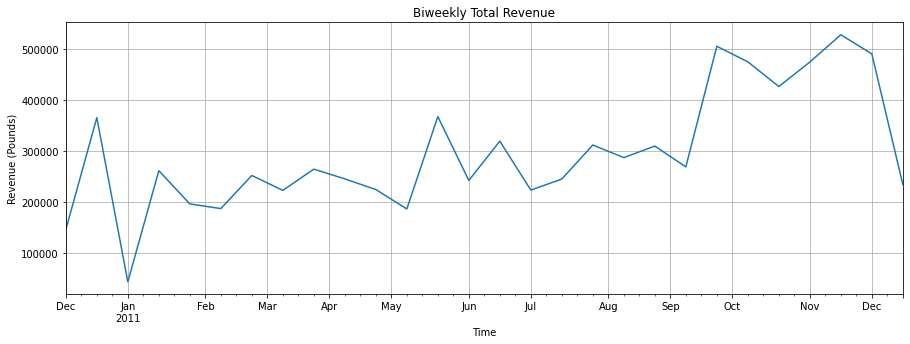

In [ ]:
# Biweekly Revenue Sum
plt.figure(figsize=(15,5))
new_df.resample('2W').Totalamount.sum().plot(grid = True)
plt.xlabel('Time')
plt.ylabel('Revenue (Pounds)')
plt.title('Biweekly Total Revenue')

Text(0.5, 1.0, 'Biweekly Transactions')

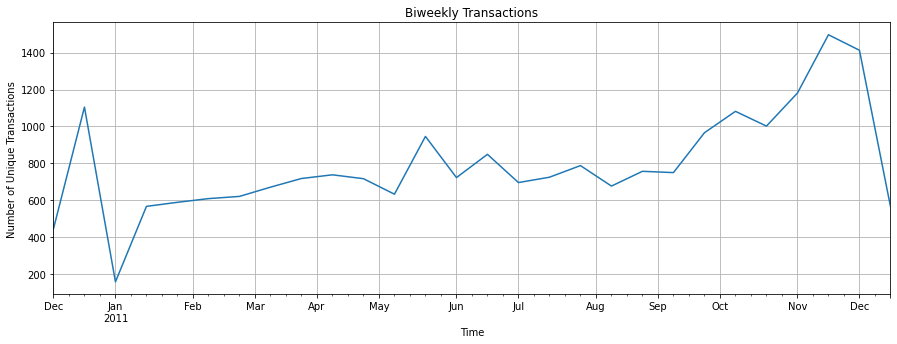

In [ ]:
# Biweekly Number of Unique Transactions
plt.figure(figsize=(15,5))
new_df.resample('2W').InvoiceNo.nunique().plot(grid = True)
plt.xlabel('Time')
plt.ylabel('Number of Unique Transactions')
plt.title('Biweekly Transactions')

In [ ]:
# Lets subset for the calender year (Jan 2010 - Jan 2012)

new_dfts = new_df.resample('2W').Totalamount.sum().loc['2010':'2012']

Text(0.5, 1.0, 'Biweekly Total Revenue')

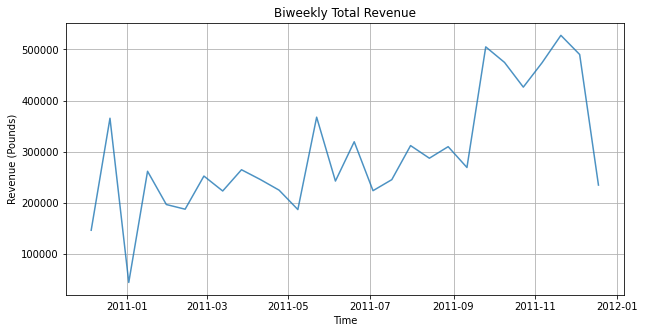

In [ ]:
# Biweekly Revenue Sum

plt.figure(figsize = (10,5))
train = new_dfts[:370679]
test = new_dfts[370679:]
plt.plot(new_dfts, alpha = 0.8)
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Revenue (Pounds)')
plt.title('Biweekly Total Revenue')

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# NAIVE FORECAST

def naive_f(train, test):
    
    # Its basically same as the last value
    
    forecast = test.copy()
    for i in forecast.index:
        forecast[i]=train[-1]
    
    return forecast
    

yhat_naive = naive_f(train,test)


# RMSE Naive

# rms_naive = sqrt(mean_squared_error(test, yhat_naive))
# print(rms_naive)

In [ ]:

# MEAN FORECAST

def mean_f(train, test):
    
    # Its basically same as the last value
    
    forecast = test.copy()
    for i in forecast.index:
        forecast[i]=test.mean()
    
    return forecast
    
yhat_mean = mean_f(train, test)
# rms_mean = sqrt(mean_squared_error(test, yhat_mean))
# print(rms_mean)

In [ ]:
# DRIFT FORECAST

def drift_m(train, test):
    
    avg_drift = (train[-1] - train[0])/len(train)
    
    forecast = test.copy()
    
    multiplier = (train[-1] + avg_drift)
    
    for i in forecast.index:
        
        forecast[i] = multiplier
        
        multiplier = (forecast[i] + avg_drift)
        
    return forecast

yhat_drift = drift_m(train, test)
# rms_drift = sqrt(mean_squared_error(test, yhat_drift))
# print(rms_drift)

In [ ]:
# Seasonal Naive



def snaive(data, test, period): # Period - Period of Seasonality
    
    forecast = data.shift(period)[len(train):]
    return forecast
    


yhat_snaive = snaive(new_dfts, test, 26)
# rms_snaive = sqrt(mean_squared_error(test, yhat_snaive))
# print(rms_snaive)

In [ ]:
dd = np.asarray(train.Totalamount)

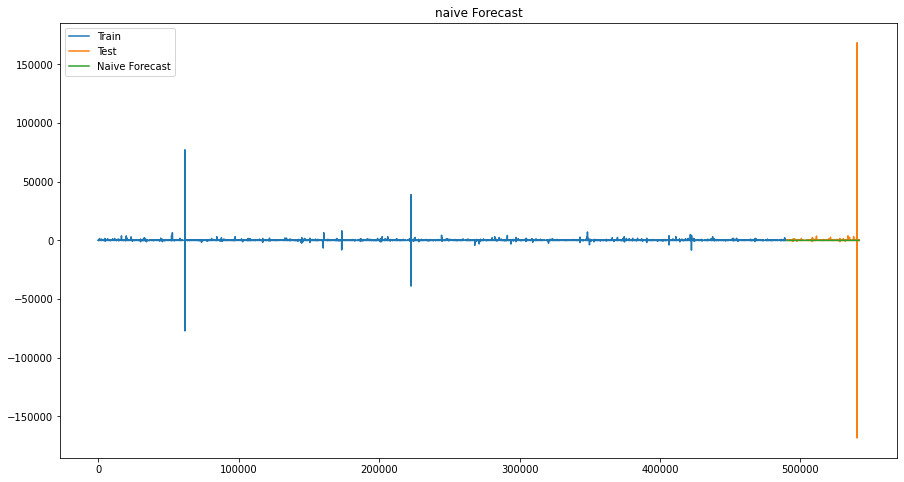

In [ ]:
# Plots
plt.figure(figsize=(15,8))
dd = np.asarray(train.Totalamount)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd) - 1]
plt.plot(train.index,train['Totalamount'],label = 'Train')
plt.plot(test.index,test['Totalamount'],label = 'Test')
plt.plot(y_hat.index,y_hat['naive'],label = 'Naive Forecast')
plt.legend(loc='best')
plt.title('naive Forecast')
plt.show()

In [ ]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# rms = sqrt(mean_squared_error(test.Totalamount, y_hat.naive))
# print(rms)

# RFM ANALYSIS

In [ ]:
import time, warnings
import datetime as dt

In [ ]:
#Recency, Frequency, Monetary analysis first we need to create three features R , F & M from the data 
# lets create those features

# Recency
# To calculate recency, we need to find out  **when was the customer's most recent purchase.**.
# Create a new column called date which contains the date of invoice only
new_df['date'] = pd.DatetimeIndex(new_df['InvoiceDate']).date
# Group by customers and check last date of purchase
recency_df = new_df.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
# Calculate recent date to find recency wrt to this date
recent_date=recency_df.LastPurshaceDate.max()
print(recent_date)
# Calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (recent_date - x).days)
recency_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


2011-12-09


,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [ ]:
# ## Frequency
# To calculate Frequency we need to check **How often a customer makes a purchase**.
# Drop duplicates
new_df1= new_df
new_df1.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
# Calculate the frequency of purchases
frequency_df = new_df1.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()
# ## Monetary
# To calculate Monetary value  **How much money did the customer spent during the timeframe?**
# Create column total cost
monetary_df = new_df.groupby(by='CustomerID',as_index=False).agg({'Totalamount': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()
# ## Create RFM Table
# Merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()
# Merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
# Use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
# Check the head
rfm_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,LastPurshaceDate,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,2011-01-18,325,2,0.00
12347.0,2011-12-07,2,7,163.16
12348.0,2011-09-25,75,4,331.36
12349.0,2011-11-21,18,1,15.00
12350.0,2011-02-02,310,1,25.20


In [ ]:
# rfm_df["Customer_segment"] = np.where(rfm_df['Recency'] > 730 & rfm_df['Recency'] < 1095 ,'Cold',(np.where(rfm_df['RFM_Score'] > 1095, 'Inactive')))
# Rank each metric R , F & M
rfm_df['R_rank'] = rfm_df['Recency'].rank( ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
rfm_df.head()
# normalize each rank with Max rank
rfm_df['R_rank_norm']=(rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm']=(rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm']=(rfm_df['F_rank']/rfm_df['M_rank'].max())*100
rfm_df.head()
# Now apply our equation and create final score **Consolidated Score = 0.15*R_rank_norm + 0.28*F_rank_norm + 0.57M_rank_norm**
rfm_df['RFM_Score']=0.15*rfm_df['R_rank_norm']+0.28*rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df=rfm_df.round(0)
rfm_df.head()

,LastPurshaceDate,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
CustomerID,,,,,,,,,,,
12346.0,2011-01-18,325,2,0.0,169.0,1722.0,178.0,4.0,39.0,39.0,34.0
12347.0,2011-12-07,2,7,163.0,4171.0,3560.0,3579.0,96.0,81.0,81.0,84.0
12348.0,2011-09-25,75,4,331.0,1642.0,2809.0,3976.0,38.0,64.0,64.0,60.0
12349.0,2011-11-21,18,1,15.0,3178.0,657.0,1066.0,73.0,15.0,15.0,24.0
12350.0,2011-02-02,310,1,25.0,238.0,657.0,1670.0,5.0,15.0,15.0,14.0


In [ ]:
# Customer segments with RFM Model
# Segment customers based on RFM score
# 0 - 50 - Low valued customer
# 50 - 75 - Medium valued customer
# 76 - 100 - High valued customer
rfm_df["Customer_segment"]=np.where(rfm_df['RFM_Score'] > 75 ,"High Value Customer",(np.where(rfm_df['RFM_Score'] < 50 , "Low value Customer" ,"Medium Value Customer")))
rfm_df.head()

,LastPurshaceDate,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
CustomerID,,,,,,,,,,,,
12346.0,2011-01-18,325,2,0.0,169.0,1722.0,178.0,4.0,39.0,39.0,34.0,Low value Customer
12347.0,2011-12-07,2,7,163.0,4171.0,3560.0,3579.0,96.0,81.0,81.0,84.0,High Value Customer
12348.0,2011-09-25,75,4,331.0,1642.0,2809.0,3976.0,38.0,64.0,64.0,60.0,Medium Value Customer
12349.0,2011-11-21,18,1,15.0,3178.0,657.0,1066.0,73.0,15.0,15.0,24.0,Low value Customer
12350.0,2011-02-02,310,1,25.0,238.0,657.0,1670.0,5.0,15.0,15.0,14.0,Low value Customer


# MARKET BASKET ANALYSIS

* As we could see most of the transactions come from UK(91.5%).So limit the data that we will use only the transaction from UK. 
* This Customer basket data will contain the quantity of each items bought per transaction (InvoiceNo)

In [ ]:
cus_basket = (new_df[new_df['Country'] == 'United Kingdom'].groupby(['InvoiceNo','Description'])['Quantity']
              .sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
cus_basket

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 BIRDS CANVAS SCREEN,...,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/ORANGE FLOWER DESIGN PLATE,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
# encode the data
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

cus_basket_encode = cus_basket.applymap(encode_units)
cus_basket_encode      

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 BIRDS CANVAS SCREEN,...,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/ORANGE FLOWER DESIGN PLATE,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C581490,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C581499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
# filter the transaction: Bought more than 1 item only
cus_basket_filter = cus_basket_encode[(cus_basket_encode > 0).sum(axis=1) >= 2]
cus_basket_filter

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 BIRDS CANVAS SCREEN,...,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/ORANGE FLOWER DESIGN PLATE,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
pip install mlxtend

In [ ]:
# apply apriori algorithm
from mlxtend.frequent_patterns import apriori

In [ ]:
frequent_itemsets = apriori(cus_basket_filter,min_support=0.003,use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.113160,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.086912,(JUMBO BAG RED RETROSPOT),1
2,0.084690,(REGENCY CAKESTAND 3 TIER),1
3,0.078083,(ASSORTED COLOUR BIRD ORNAMENT),1
4,0.077542,(PARTY BUNTING),1
...,...,...,...
13799,0.003003,"(LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE,...",5
13800,0.003003,"(JUMBO STORAGE BAG SKULLS, LUNCH BAG BLACK SK...",3
13801,0.003003,"(LUNCH BAG CARS BLUE, JUMBO STORAGE BAG SUKI, ...",3
13802,0.003003,"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG DOLLY G...",3


In [ ]:
# finding the association between frequently bought items
from mlxtend.frequent_patterns import association_rules

In [ ]:
# generating rules
cus_rules = association_rules(frequent_itemsets,metric='lift')

In [ ]:
cus_rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [ ]:
cus_rules.sort_values(by=["confidence"],axis=0,ascending=False) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
79730,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(ROSES REGENCY TEACUP AND SAUCER ),0.003123,0.040723,0.003123,1.000000,24.556047,0.002996,inf
90187,"(REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE R...",(ROSES REGENCY TEACUP AND SAUCER ),0.003003,0.040723,0.003003,1.000000,24.556047,0.002881,inf
91215,"(REGENCY SUGAR BOWL GREEN, GREEN REGENCY TEACU...",(REGENCY TEA PLATE GREEN ),0.003003,0.013634,0.003003,1.000000,73.343612,0.002962,inf
71308,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(ROSES REGENCY TEACUP AND SAUCER ),0.003243,0.040723,0.003243,1.000000,24.556047,0.003111,inf
79685,"(REGENCY TEA PLATE ROSES , REGENCY CAKESTAND 3...",(ROSES REGENCY TEACUP AND SAUCER ),0.003123,0.040723,0.003123,1.000000,24.556047,0.002996,inf
...,...,...,...,...,...,...,...,...,...
93217,(WHITE HANGING HEART T-LIGHT HOLDER),"(WOODEN FRAME ANTIQUE WHITE , WOOD BLACK BOARD...",0.113160,0.007568,0.003003,0.026539,3.506765,0.002147,1.019488
93452,(WHITE HANGING HEART T-LIGHT HOLDER),(ENAMEL BREAD BIN CREAM),0.113160,0.018800,0.003003,0.026539,1.411669,0.000876,1.007950
93629,(WHITE HANGING HEART T-LIGHT HOLDER),(FAMILY PHOTO FRAME CORNICE),0.113160,0.013154,0.003003,0.026539,2.017591,0.001515,1.013750
95316,(WHITE HANGING HEART T-LIGHT HOLDER),(MINIATURE ANTIQUE ROSE HOOK IVORY),0.113160,0.012914,0.003003,0.026539,2.055128,0.001542,1.013997


# RECOMMENDATION ENGINE(work in progress)

In [ ]:
pip install lightfm

     |████████████████████████████████| 310 kB 5.4 MB/s 
  Created wheel for lightfm: filename=lightfm-1.16-cp37-cp37m-linux_x86_64.whl size=705359 sha256=af30a534d5bcc8829083c4d0530f73c110bbd5e47cad974f3b1957e8f1dd98e4
  Stored in directory: /root/.cache/pip/wheels/f8/56/28/5772a3bd3413d65f03aa452190b00898b680b10028a1021914
Successfully built lightfm


In [ ]:
pip install scikit-optimize

     |████████████████████████████████| 100 kB 4.1 MB/s 


In [ ]:
# import dependent libraries
import pandas as pd
import os
from scipy.sparse import csr_matrix
import numpy as np
from IPython.display import display_html
import warnings

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline

from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import auc_score, precision_at_k, recall_at_k
from lightfm import LightFM
from skopt import forest_minimize

In [ ]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Totalamount,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


In [ ]:
interactions = pd.DataFrame(new_df)

In [ ]:
new_df['Description'].nunique()

3896

In [ ]:
# Limit the retail metadata to selected fields
interactions_selected = interactions[['CustomerID', 'InvoiceNo','Totalamount']]

# mapping boolean to string
# booleanDictionary = {True: 'true', False: 'false'}
# interactions_selected['is_read'] = interactions_selected['is_read'].replace(booleanDictionary)

interactions_selected.sample(5)

,CustomerID,InvoiceNo,Totalamount
488185,15484.0,577800,60.0
132445,14256.0,547665,29.7
259893,18122.0,559774,5.1
75941,17463.0,542617,2.6
493290,17700.0,578225,7.9


In [ ]:
item_dict ={}
df2 = new_df[['CustomerID', 'Description']].sort_values('CustomerID').reset_index()

for i in range(df2.shape[0]):
    item_dict[(df2.loc[i,'CustomerID'])] = df2.loc[i,'Description']

In [ ]:
# dummify categorical features
retail_metadata_selected_transformed = pd.get_dummies(new_df, columns = ['Description','Country'])
                                                                                         

retail_metadata_selected_transformed = retail_metadata_selected_transformed.sort_values('CustomerID').reset_index().drop('index', axis=1)
retail_metadata_selected_transformed.head(5)

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Totalamount,InvoiceDate,Description_ 4 PURPLE FLOCK DINNER CANDLES,Description_ 50'S CHRISTMAS GIFT BAG LARGE,Description_ DOLLY GIRL BEAKER,Description_ I LOVE LONDON MINI BACKPACK,Description_ I LOVE LONDON MINI RUCKSACK,Description_ NINE DRAWER OFFICE TIDY,Description_ OVAL WALL MIRROR DIAMANTE,Description_ RED SPOT GIFT BAG LARGE,Description_ SET 2 TEA TOWELS I LOVE LONDON,Description_ SPACEBOY BABY GIFT SET,Description_ TOADSTOOL BEDSIDE LIGHT,Description_ TRELLIS COAT RACK,Description_10 COLOUR SPACEBOY PEN,Description_12 COLOURED PARTY BALLOONS,Description_12 DAISY PEGS IN WOOD BOX,Description_12 EGG HOUSE PAINTED WOOD,Description_12 HANGING EGGS HAND PAINTED,Description_12 IVORY ROSE PEG PLACE SETTINGS,Description_12 MESSAGE CARDS WITH ENVELOPES,Description_12 PENCIL SMALL TUBE WOODLAND,Description_12 PENCILS SMALL TUBE RED RETROSPOT,Description_12 PENCILS SMALL TUBE SKULL,Description_12 PENCILS TALL TUBE POSY,Description_12 PENCILS TALL TUBE RED RETROSPOT,Description_12 PENCILS TALL TUBE SKULLS,Description_12 PENCILS TALL TUBE WOODLAND,Description_12 PINK HEN+CHICKS IN BASKET,Description_12 PINK ROSE PEG PLACE SETTINGS,Description_12 RED ROSE PEG PLACE SETTINGS,Description_15 PINK FLUFFY CHICKS IN BOX,Description_15CM CHRISTMAS GLASS BALL 20 LIGHTS,Description_16 PC CUTLERY SET PANTRY DESIGN,Description_16 PIECE CUTLERY SET PANTRY DESIGN,...,Description_ZINC WILLIE WINKIE CANDLE STICK,Description_ZINC WIRE KITCHEN ORGANISER,Description_ZINC WIRE SWEETHEART LETTER TRAY,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,Country_Denmark,Country_EIRE,Country_European Community,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Iceland,Country_Israel,Country_Italy,Country_Japan,Country_Lebanon,Country_Lithuania,Country_Malta,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,12346.0,541431,23166,74215,1.04,77183.6,2011-01-18 10:01:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,12346.0,C541433,23166,-74215,1.04,-77183.6,2011-01-18 10:17:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12347.0,562032,21578,6,2.25,13.5,2011-08-02 08:48:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12347.0,542237,47559B,10,1.25,12.5,2011-01-26 14:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12347.0,542237,21154,10,1.25,12.5,2011-01-26 14:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from scipy.sparse import csr_matrix

In [ ]:

# convert to csr matrix
retail_metadata_csr = csr_matrix(retail_metadata_selected_transformed.drop('CustomerID', axis=1).values)
retail_metadata_csr

**References**
* https://www.analyticsvidhya.com/blog/2021/04/customer-lifetime-value-using-rfm-analysis/
* https://medium.com/@jihargifari/how-to-perform-market-basket-analysis-in-python-bd00b745b106
